In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,make_scorer, roc_curve, roc_auc_score 
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

In [7]:
data = np.load('FEAdata/dev_data.npy')
X_val = np.load('FEAdata/val_data.npy')
X = data.T[:-1].T
y = data.T[-1]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, shuffle=True)

# Hyparameter Tuning Model1 : XgBoost

In [8]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.01, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15, 25, 42],
 "min_child_weight" : [ 1, 3, 5, 7, 10, 15, 20 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4, 0.6, 0.9 ],
 "colsample_bytree" : [  0.1, 0.3, 0.4, 0.5 , 0.7, 0.9, 1.0 ]
    
}
model = XGBClassifier()
random_search=RandomizedSearchCV(model,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
random_search.fit(X_train,y_train)
val = list(random_search.best_params_.values())

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END colsample_bytree=1.0, gamma=0.9, learning_rate=0.1, max_depth=5, min_child_weight=7;, score=0.989 total time= 1.0min
[CV 3/5] END colsample_bytree=1.0, gamma=0.9, learning_rate=0.1, max_depth=5, min_child_weight=7;, score=0.989 total time= 1.0min
[CV 2/5] END colsample_bytree=1.0, gamma=0.9, learning_rate=0.1, max_depth=5, min_child_weight=7;, score=0.990 total time= 1.0min
[CV 3/5] END colsample_bytree=0.7, gamma=0.9, learning_rate=0.15, max_depth=8, min_child_weight=5;, score=0.995 total time= 1.2min
[CV 5/5] END colsample_bytree=0.7, gamma=0.9, learning_rate=0.15, max_depth=8, min_child_weight=5;, score=0.996 total time= 1.2min
[CV 4/5] END colsample_bytree=0.7, gamma=0.9, learning_rate=0.15, max_depth=8, min_child_weight=5;, score=0.996 total time= 1.2min
[CV 2/5] END colsample_bytree=0.7, gamma=0.9, learning_rate=0.15, max_depth=8, min_child_weight=5;, score=0.996 total time= 1.2min
[CV 1/5] END colsample_byt

The model used is XGBoost
The accuracy is  0.9745418053134738
The precision is 0.9749548975910007
The recall is 0.9739213399766776
The F1-Score is 0.9744378447178618
The Matthews correlation coefficient is 0.9490833122002836
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97      9500
         1.0       0.97      0.97      0.97      9433

    accuracy                           0.97     18933
   macro avg       0.97      0.97      0.97     18933
weighted avg       0.97      0.97      0.97     18933



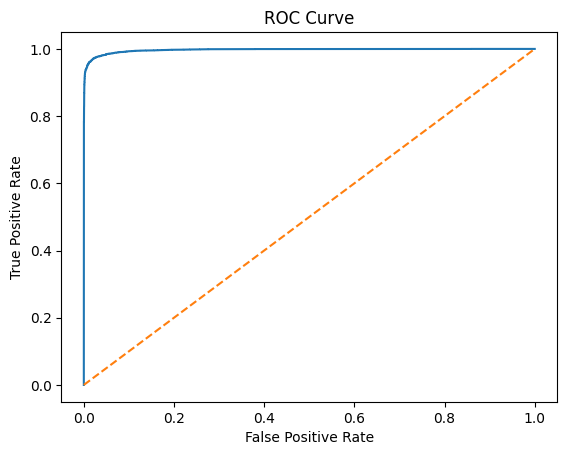

AUC score: 0.9969321530796142


In [9]:
model = XGBClassifier(colsample_bytree=val[4], gamma=val[3], learning_rate=val[2], max_depth=val[1], min_child_weight=val[0])
xgb_param = model.get_xgb_params()
extra = {'num_class': 2}
xgb_param.update(extra)
model.fit(X_train, y_train)
# display(model.score(X_test, y_test))

y_pred = model.predict(X_test)
print("The model used is XGBoost")
acc= accuracy_score(y_test, y_pred)
print("The accuracy is  {}".format(acc))
prec= precision_score(y_test, y_pred)
print("The precision is {}".format(prec))
rec= recall_score(y_test, y_pred)
print("The recall is {}".format(rec))
f1= f1_score(y_test, y_pred)
print("The F1-Score is {}".format(f1))
MCC=matthews_corrcoef(y_test, y_pred)
print("The Matthews correlation coefficient is {}".format(MCC))
print(classification_report(y_test, y_pred))
probs_xg = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probs_xg)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_test, probs_xg)
print('AUC score:', auc)

In [13]:
model.save_model("XGBmodel.json")

The model used is XGBoost
The accuracy is  0.9872602045128032
The precision is 0.9887885723974229
The recall is 0.9856967801909913
The F1-Score is 0.9872402556180965
The Matthews correlation coefficient is 0.9745251730924561
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     47332
         1.0       0.99      0.99      0.99     47332

    accuracy                           0.99     94664
   macro avg       0.99      0.99      0.99     94664
weighted avg       0.99      0.99      0.99     94664



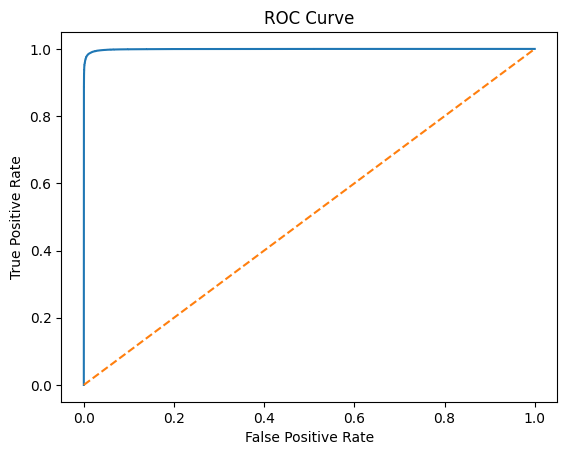

AUC score: 0.9992032285945465


In [12]:
y_pred = model.predict(X)
print("The model used is XGBoost")
acc= accuracy_score(y, y_pred)
print("The accuracy is  {}".format(acc))
prec= precision_score(y, y_pred)
print("The precision is {}".format(prec))
rec= recall_score(y, y_pred)
print("The recall is {}".format(rec))
f1= f1_score(y, y_pred)
print("The F1-Score is {}".format(f1))
MCC=matthews_corrcoef(y, y_pred)
print("The Matthews correlation coefficient is {}".format(MCC))
print(classification_report(y, y_pred))
probs_xg = model.predict_proba(X)[:,1]
fpr, tpr, thresholds = roc_curve(y, probs_xg)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y, probs_xg)
print('AUC score:', auc)